# Endometrium analysis - clusters visualization

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import anndata
import os
import sys

def MovePlots(plotpattern, subplotdir):
    os.system('mkdir -p '+str(sc.settings.figdir)+'/'+subplotdir)
    os.system('mv '+str(sc.settings.figdir)+'/*'+plotpattern+'** '+str(sc.settings.figdir)+'/'+subplotdir)

sc.settings.verbosity = 1  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.figdir = './cellXgene/'
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80)  # low dpi (dots per inch) yields small inline figures

sys.executable

scanpy==1.4.4.post1 anndata==0.6.22.post1 umap==0.3.10 numpy==1.17.5 scipy==1.4.1 pandas==0.25.3 scikit-learn==0.22.1 statsmodels==0.10.2 python-igraph==0.7.1 louvain==0.6.1


'/home/jovyan/my-conda-envs/myenvSC/bin/python'

## Load data

In [2]:
adata = sc.read('data/endometrium-N2-clean-manifold.h5ad')

In [3]:
adata.X.shape

(65191, 26245)

### Load cell annotation

In [5]:
meta = pd.read_csv('data/cell_annotations/all_NEW.csv')
meta = meta.set_index('cluster')
meta.head()

,colour,clusterid
cluster,,
0,#C1B4A7,eS
10,#837162,fibroblasts
1,#5A5A5C,PV1
5,#E07B91,epi glandular
15,#8595E1,epi ciliated


### Transfer labels

In [6]:
cell_annot = meta['clusterid'].to_dict()

... storing 'clusters' as categorical


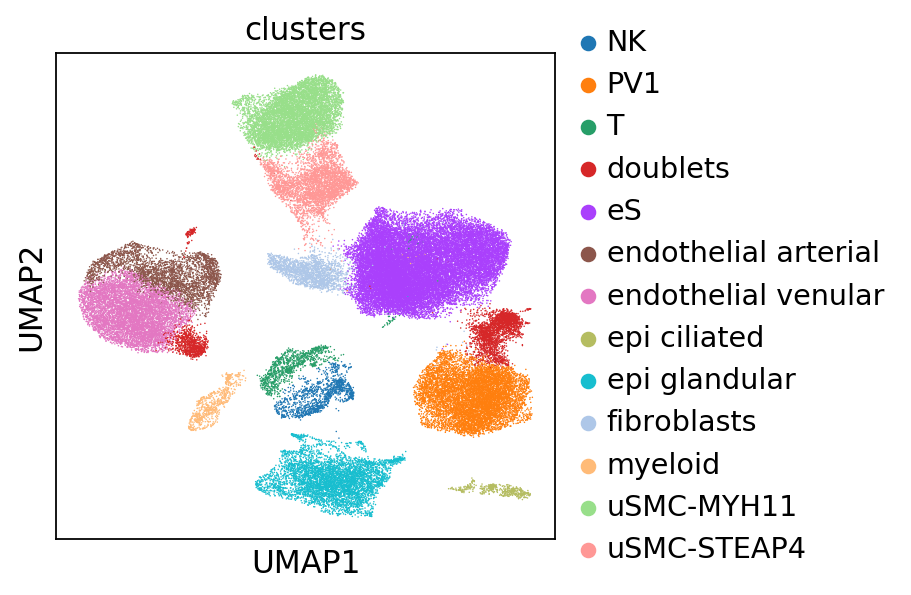

In [7]:
adata.obs['clusters'] = [ cell_annot[int(i)] for i in adata.obs['leiden'] ]
sc.pl.umap(adata, color=['clusters'])

In [8]:
# adata.obs['clusters'].cat.reorder_categories(set(meta['clusterid']), inplace=True)

### Transfer colors

In [9]:
meta = meta.set_index('clusterid')
colors_annot = meta.colour.to_dict()
colors_annot

{'eS': '#C1B4A7',
 'fibroblasts': '#837162',
 'PV1': '#5A5A5C',
 'epi glandular': '#E07B91',
 'epi ciliated': '#8595E1',
 'NK': '#3FAC5D',
 'myeloid': '#43C7F4',
 'endothelial venular': '#D3BF6A',
 'doublets': '#C7C7C7',
 'T': '#F15C5B',
 'endothelial arterial': '#E2DC66',
 'uSMC-MYH11': '#3D4C59',
 'uSMC-STEAP4': '#4A5F70'}

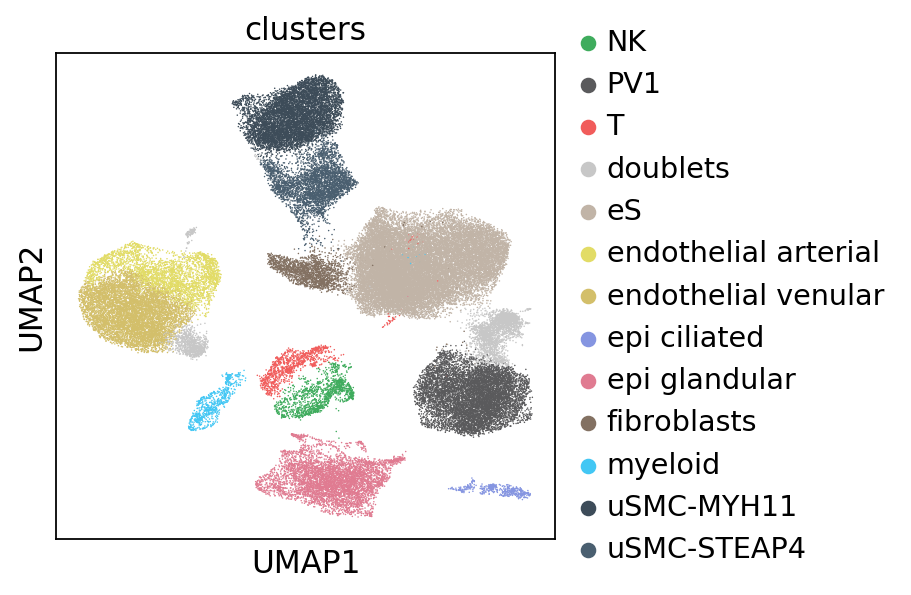

In [10]:
adata.uns['clusters_colors'] = [ colors_annot[i] for i in adata.obs['clusters'].cat.categories ]
sc.pl.umap(adata, color=['clusters'])

# Replace gene expression

In [11]:
adata_count = anndata.AnnData(X=adata.raw.X, var=adata.raw.var, obs=adata.obs, asview=False)
sc.pp.normalize_per_cell(adata_count, counts_per_cell_after=1e4)
sc.pp.log1p(adata_count)
sc.pp.scale(adata_count)
adata_count.obsm['X_umap'] = adata.obsm['X_umap']
adata_count.uns['clusters_colors'] = adata.uns['clusters_colors']

In [13]:
adata_count.write('cellXgene/endometrium_all.h5ad')